# G2M insight for Cab Investment firm ( Must for all Specialization)

In [230]:
import pandas as pd
import numpy as np
import seaborn as sb
import xlrd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tabulate import tabulate
js = ""
display(HTML(js))


%matplotlib inline
sb.set_style("darkgrid")

## The Cab Dataset

In [231]:
cab_data = pd.read_csv("/Users/khaledelshamy/Desktop/CAB-INVESTMENT-EDA-main/Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [232]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [233]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [234]:
cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20


In [239]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format='%d-%m-%Y')
for col in cab_data.columns:
    if ' ' in col:
        cdata = cab_data.rename(columns={col:col.replace(' ','_')})

In [240]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## City Dataset

In [241]:
city = pd.read_csv("/Users/khaledelshamy/Desktop/CAB-INVESTMENT-EDA-main/City.csv")
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [262]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     int64  
 2   Users       20 non-null     int64  
 3   User %      20 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 768.0+ bytes


In [243]:
#turning the columns users and population into  numeric
city['Users']=city['Users'].replace('"', '')
city['Population']=city['Population'].replace('"', '')

city['Users']=city['Users'].replace(',', '', regex=True).astype(int)
city['Population']=city['Population'].replace(',', '', regex=True).astype(int)

In [244]:
city

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247
5,ORANGE COUNTY,1030185,12994
6,SAN DIEGO CA,959307,69995
7,PHOENIX AZ,943999,6133
8,DALLAS TX,942908,22157
9,ATLANTA GA,814885,24701


In [245]:
# creating a new column to calculate the percentage of user per city

city['User %'] = (city['Users'] / 
                  city['Users'].sum()) * 100
city

,City,Population,Users,User %
0,NEW YORK NY,8405837,302149,23.414907
1,CHICAGO IL,1955130,164468,12.745377
2,LOS ANGELES CA,1595037,144132,11.169447
3,MIAMI FL,1339155,17675,1.369717
4,SILICON VALLEY,1177609,27247,2.111495
5,ORANGE COUNTY,1030185,12994,1.006964
6,SAN DIEGO CA,959307,69995,5.424232
7,PHOENIX AZ,943999,6133,0.475274
8,DALLAS TX,942908,22157,1.717047
9,ATLANTA GA,814885,24701,1.914193


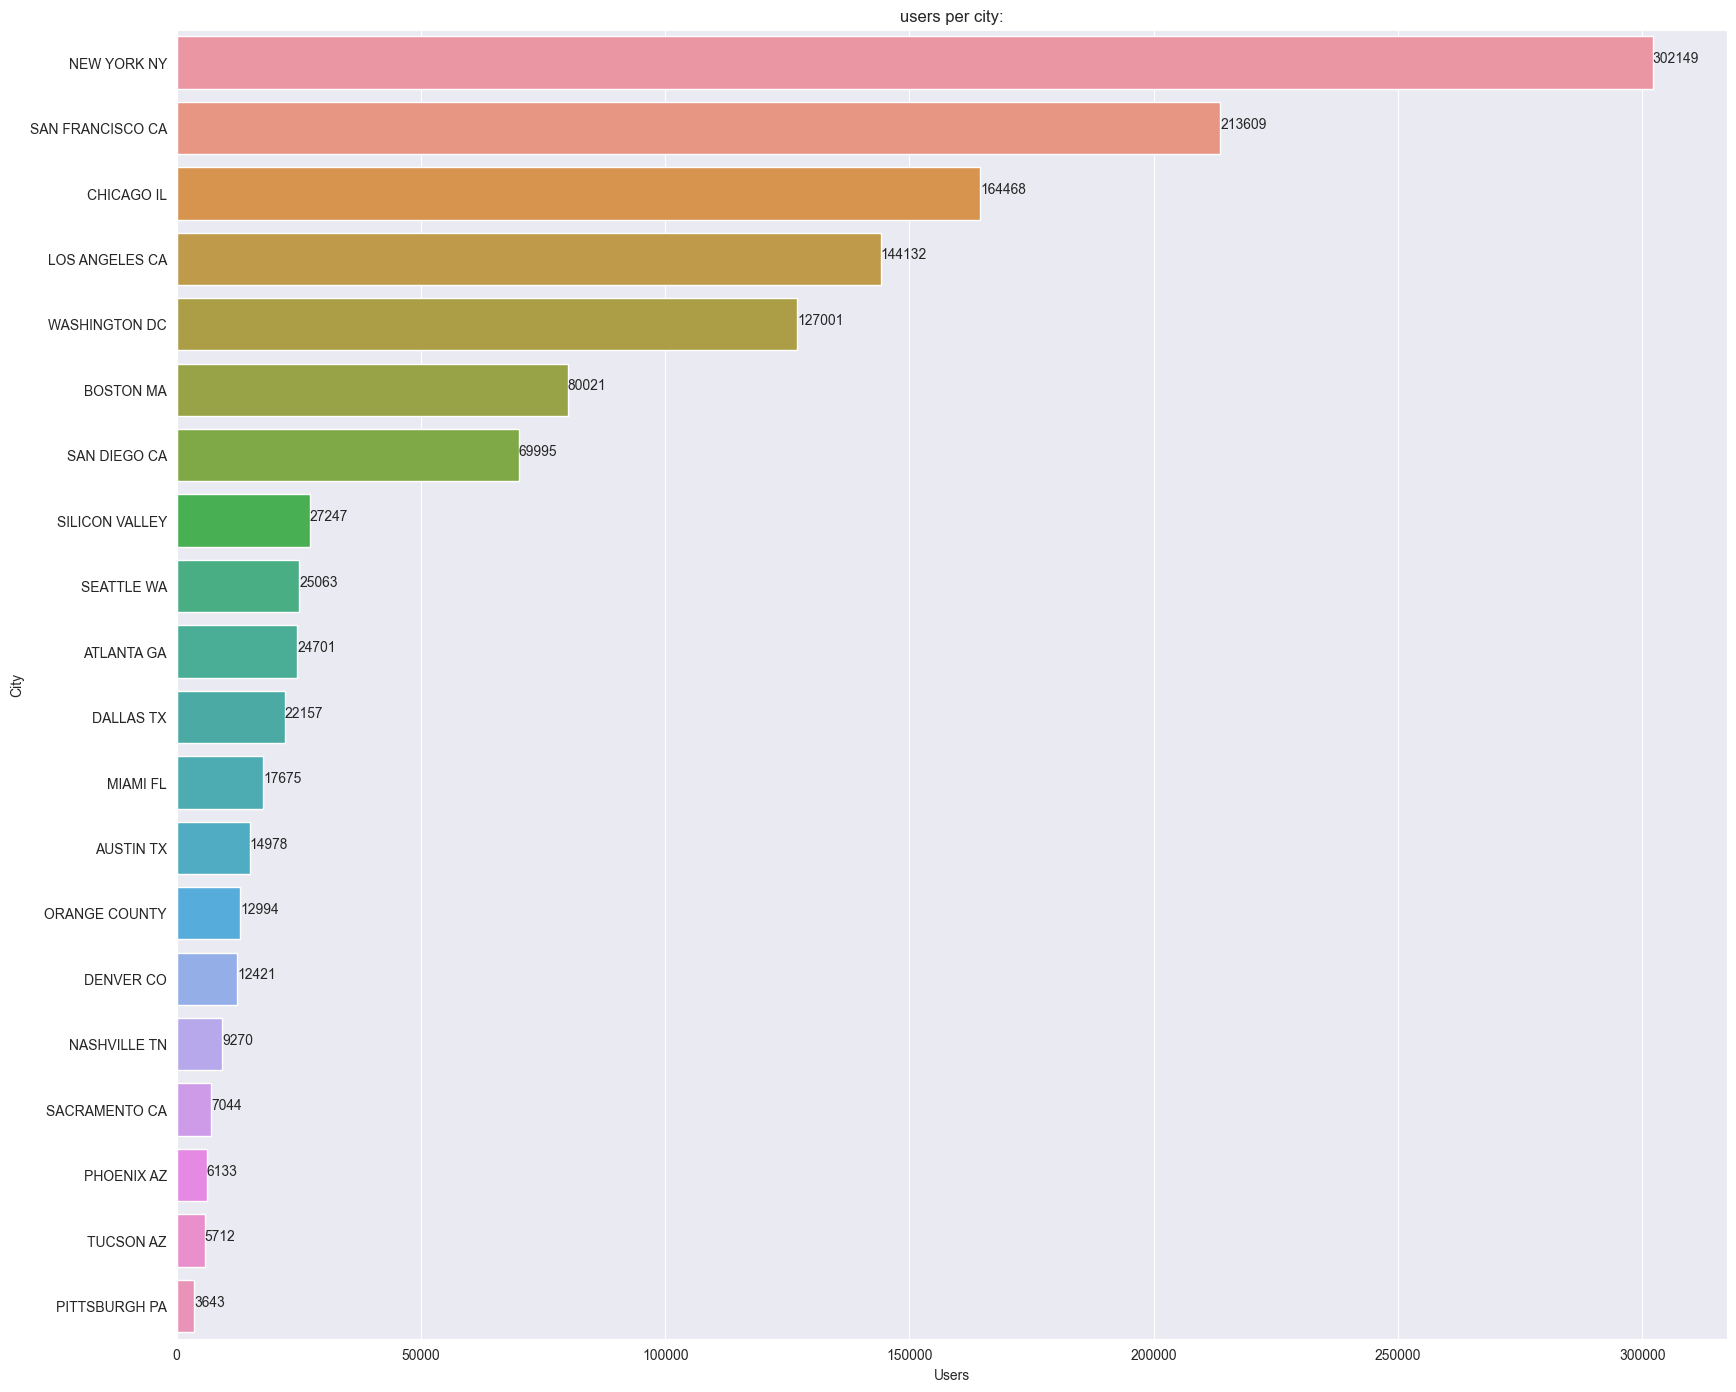

In [246]:
# checking users per city
users_per_city=pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)
plt.figure(figsize=(20, 17));
g=sb.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)))
plt.title('users per city:');

<AxesSubplot: title={'center': ' USER PRESENCE IN EACH CITY'}, ylabel='Users'>

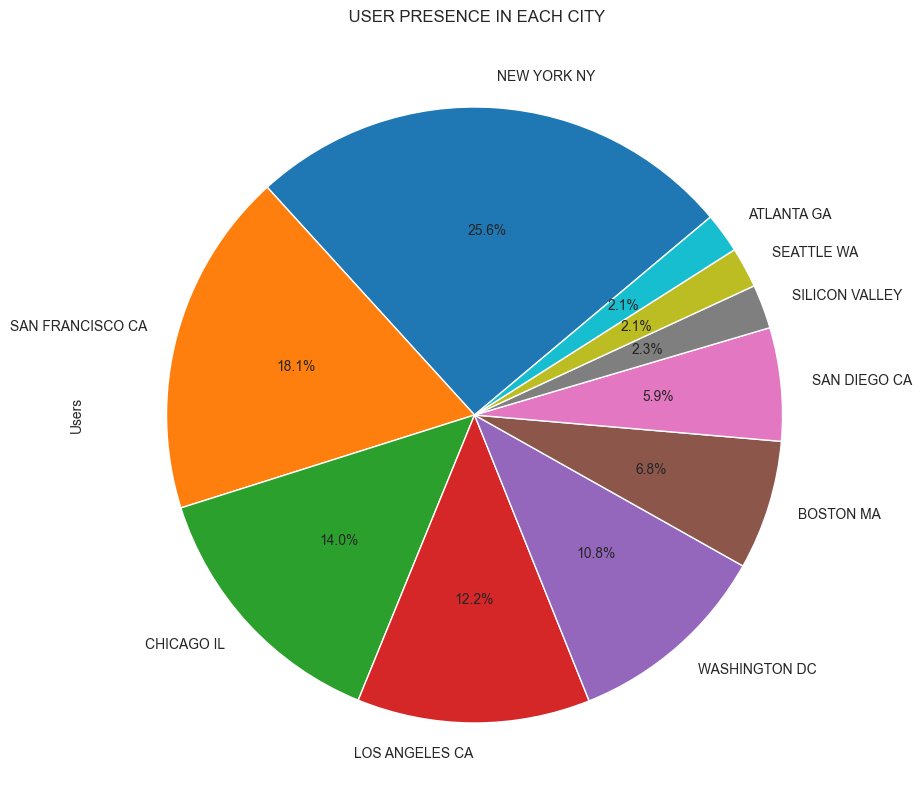

In [247]:
plt.title(" USER PRESENCE IN EACH CITY")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

## Transaction Dataset

In [248]:
trans_data = pd.read_csv("/Users/khaledelshamy/Desktop/CAB-INVESTMENT-EDA-main/Transaction_ID.csv")
trans_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [249]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [250]:
trans_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,440098.0,1.022006e+07,127045.493722,10000011.0,10110035.25,10220059.5,10330083.75,10440108.0
Customer ID,440098.0,2.361951e+04,21195.549816,1.0,3530.00,15168.0,43884.00,60000.0


In [251]:
trans_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [252]:
# PERFORMING INNER JOIN ON THE TRNSACTION DATASET AND CAB DATASET ON TRANSACTION ID
trans_cab_data = pd.merge(trans_data, cab_data, on=["Transaction ID"])
trans_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,27182,Card,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,53286,Cash,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,52265,Cash,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,52175,Card,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [253]:
trans_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Customer ID     359392 non-null  int64         
 2   Payment_Mode    359392 non-null  object        
 3   Date of Travel  359392 non-null  datetime64[ns]
 4   Company         359392 non-null  object        
 5   City            359392 non-null  object        
 6   KM Travelled    359392 non-null  float64       
 7   Price Charged   359392 non-null  float64       
 8   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.4+ MB


## The Customer Dataset

In [254]:
customer_data=pd.read_csv("/Users/khaledelshamy/Desktop/CAB-INVESTMENT-EDA-main/Customer_ID.csv")
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [255]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [256]:
Global_cab_data= pd.merge(trans_cab_data, customer_data, on=["Customer ID"])

## Golabal Cab Data

In [257]:
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454


In [258]:
print("The global cab data shape:",Global_cab_data.shape)

The global cab data shape: (359392, 12)


In [259]:
Global_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Date of Travel      359392 non-null  datetime64[ns]
 4   Company             359392 non-null  object        
 5   City                359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Gender              359392 non-null  object        
 10  Age                 359392 non-null  int64         
 11  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 35.6+ MB


In [260]:
Global_cab_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,10000011.0,1.011081e+07,10221035.50,1.033094e+07,10440107.00
Customer ID,359392.0,1.919165e+04,21012.412463,1.0,2.705000e+03,7459.00,3.607800e+04,60000.00
KM Travelled,359392.0,2.256725e+01,12.233526,1.9,1.200000e+01,22.44,3.296000e+01,48.00
Price Charged,359392.0,4.234433e+02,274.378911,15.6,2.064375e+02,386.36,5.836600e+02,2048.03
Cost of Trip,359392.0,2.861901e+02,157.993661,19.0,1.512000e+02,282.48,4.136832e+02,691.20
Age,359392.0,3.533670e+01,12.594234,18.0,2.500000e+01,33.00,4.200000e+01,65.00
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2000.0,8.424000e+03,14685.00,2.103500e+04,35000.00


In [264]:
Global_cab_data[Global_cab_data.duplicated()]

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)


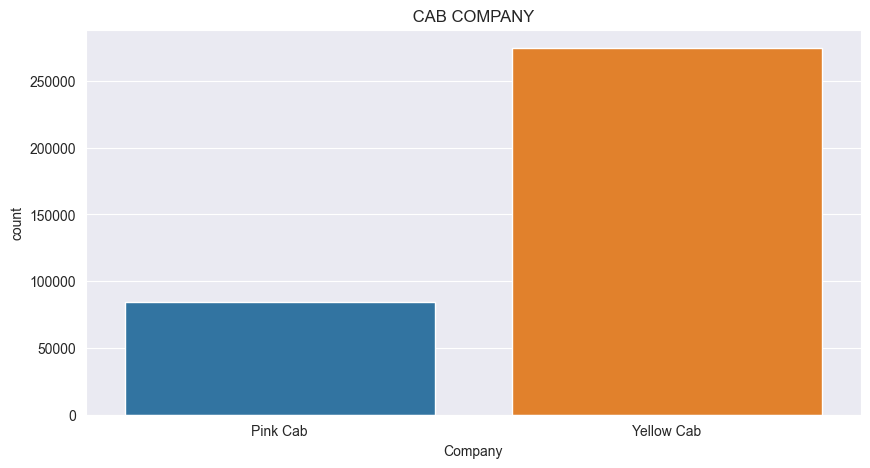

In [265]:
# visualizing the number of pink and yellow cab users

plt.figure(figsize=(10,5))
sb.countplot(Global_cab_data.Company)
plt.title(" CAB COMPANY ")
plt.show()

In [266]:
# creating a new colum which is the difference between the price charged and the actual cost of trip
Global_cab_data['Profit']=Global_cab_data['Price Charged']-Global_cab_data['Cost of Trip']
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600


## Profit Analysis

### Profit Analysis by Age Group

In [267]:
# lets group customer's age
labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]
Global_cab_data["Age group"] = pd.cut(Global_cab_data.Age, range(10,75, 10), right=False, labels=labels)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29


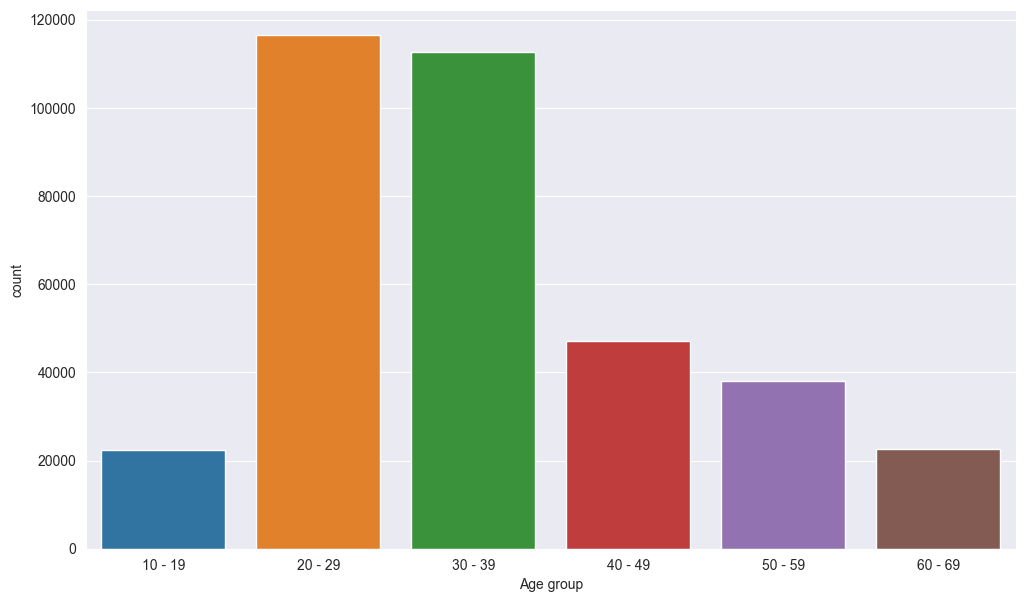

In [268]:
plt.figure(figsize=(12,7))
sb.countplot(Global_cab_data["Age group"])
plt.show()

Most cab users between the age of 20-29

In [300]:
def plot_figure2(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.bar(stacked = True, figsize = (x,y),width=0.5)
    xt = plt.xticks(rotation=0)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    print(labels)
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()
            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

In [301]:
pivot_age_profit = Global_cab_data.pivot_table(index = ["Age group"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
pivot_age_profit

Company,Pink Cab,Yellow Cab
Age group,,
10 - 19,348652.310,2.629782e+06
20 - 29,1736816.036,1.441520e+07
30 - 39,1653445.088,1.380429e+07
40 - 49,673046.482,5.868938e+06
50 - 59,558934.187,4.622999e+06
60 - 69,336434.218,2.679162e+06


['11.7% ', '10.8% ', '10.7% ', '10.3% ', '10.8% ', '11.2% ', '88.3% ', '89.2% ', '89.3% ', '89.7% ', '89.2% ', '88.8% ']


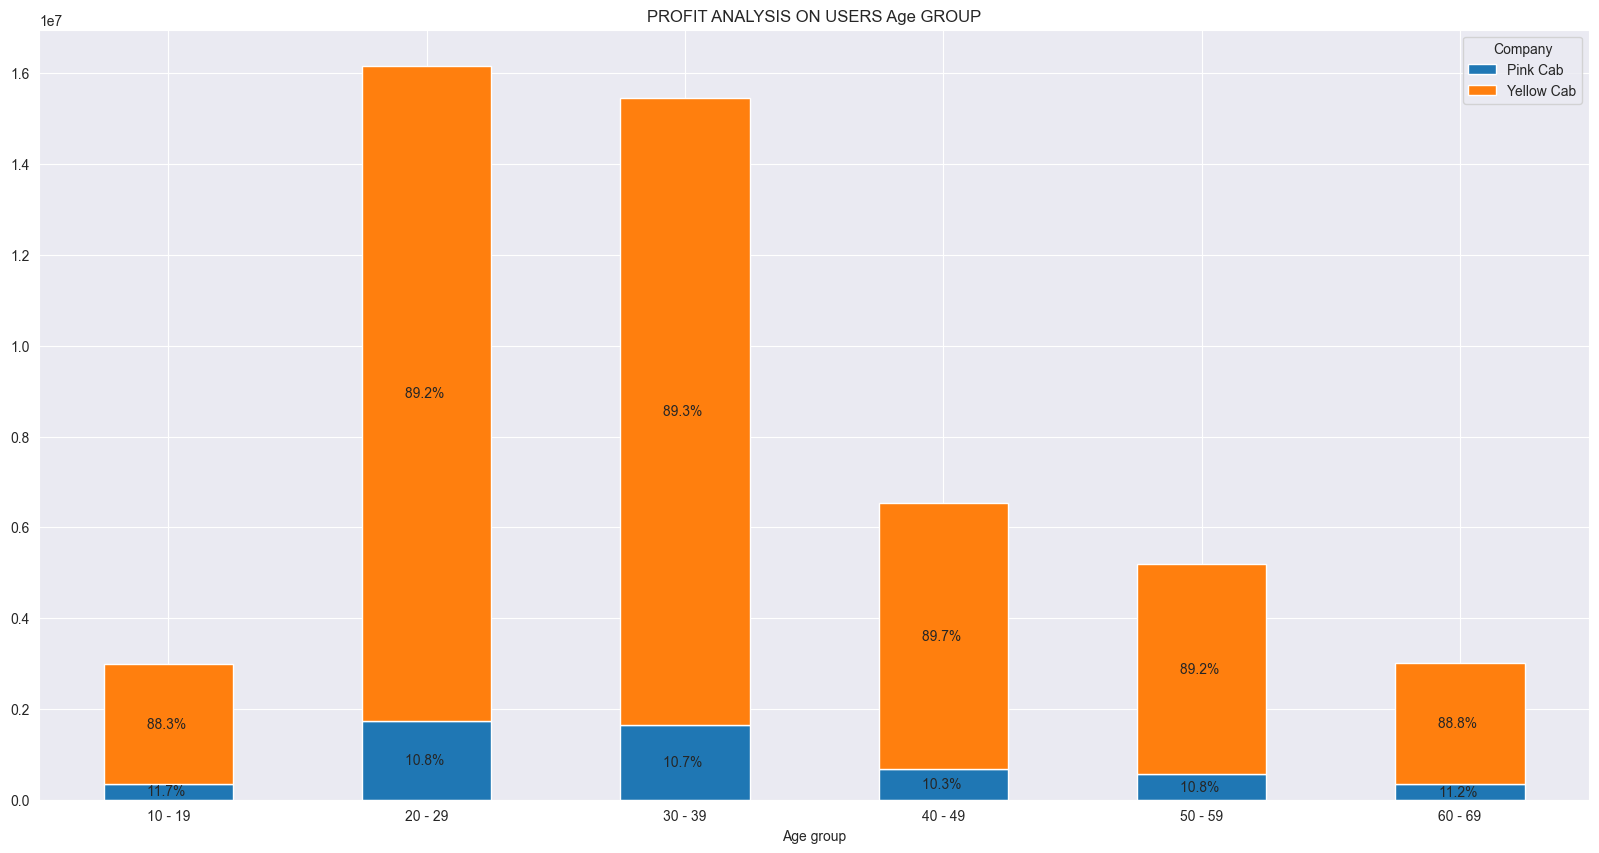

In [302]:
plot_figure2(pivot_age_profit, "PROFIT ANALYSIS ON USERS Age GROUP",0.45,20,10)

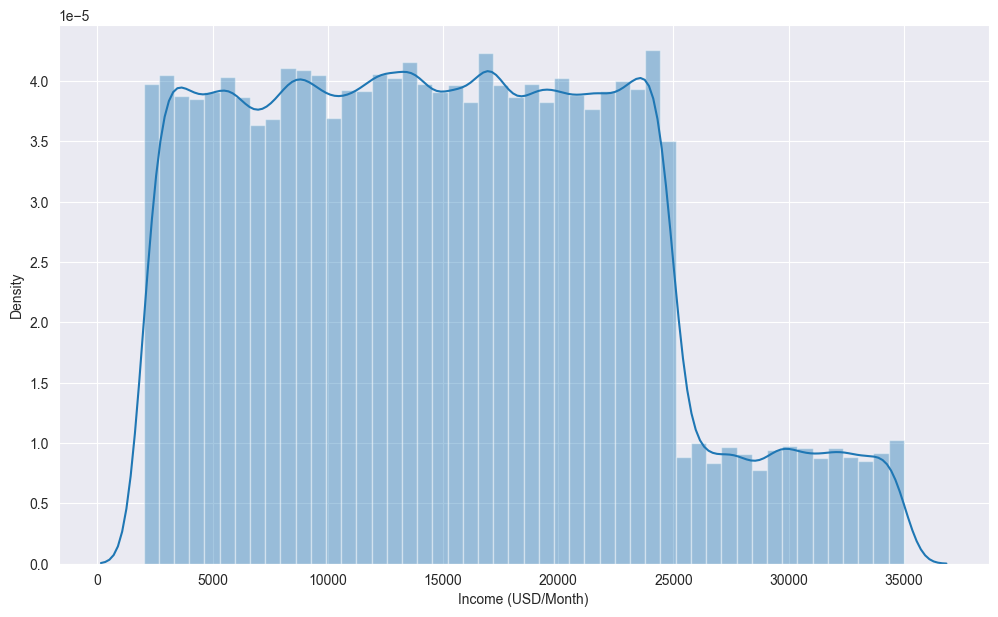

In [303]:
#INCOME DO SOMETHING
plt.figure(figsize=(12,7))
sb.distplot(Global_cab_data['Income (USD/Month)'])
plt.show()

Most users have an income that ranges from 2000 to 24000


In [304]:
labelz = ["{0} - {1}".format(i, i + 3000) for i in range(2000, 35000, 5000)]

Global_cab_data["Income grouped"] = pd.cut(Global_cab_data['Income (USD/Month)'], range(2000,40000, 5000), right=False, labels=labelz)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000


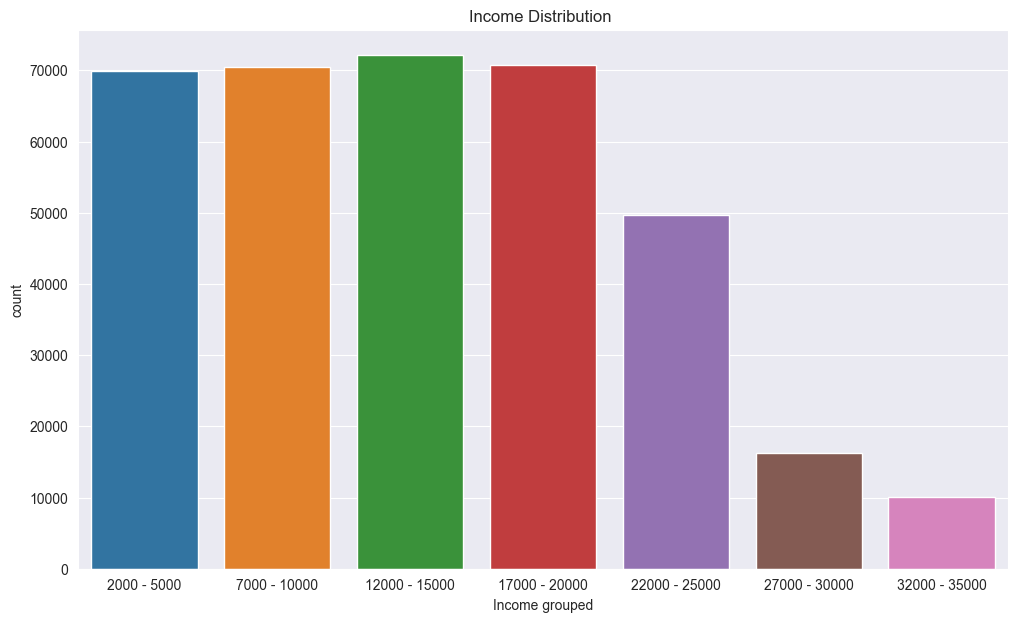

In [305]:
# visualizing the IMCOME 
plt.figure(figsize=(12,7))
sb.countplot(Global_cab_data["Income grouped"],palette="tab10")
plt.title("Income Distribution ")
plt.show()

['11.0% ', '10.6% ', '10.6% ', '10.7% ', '10.9% ', '10.9% ', '11.2% ', '89.0% ', '89.4% ', '89.4% ', '89.3% ', '89.1% ', '89.1% ', '88.8% ']


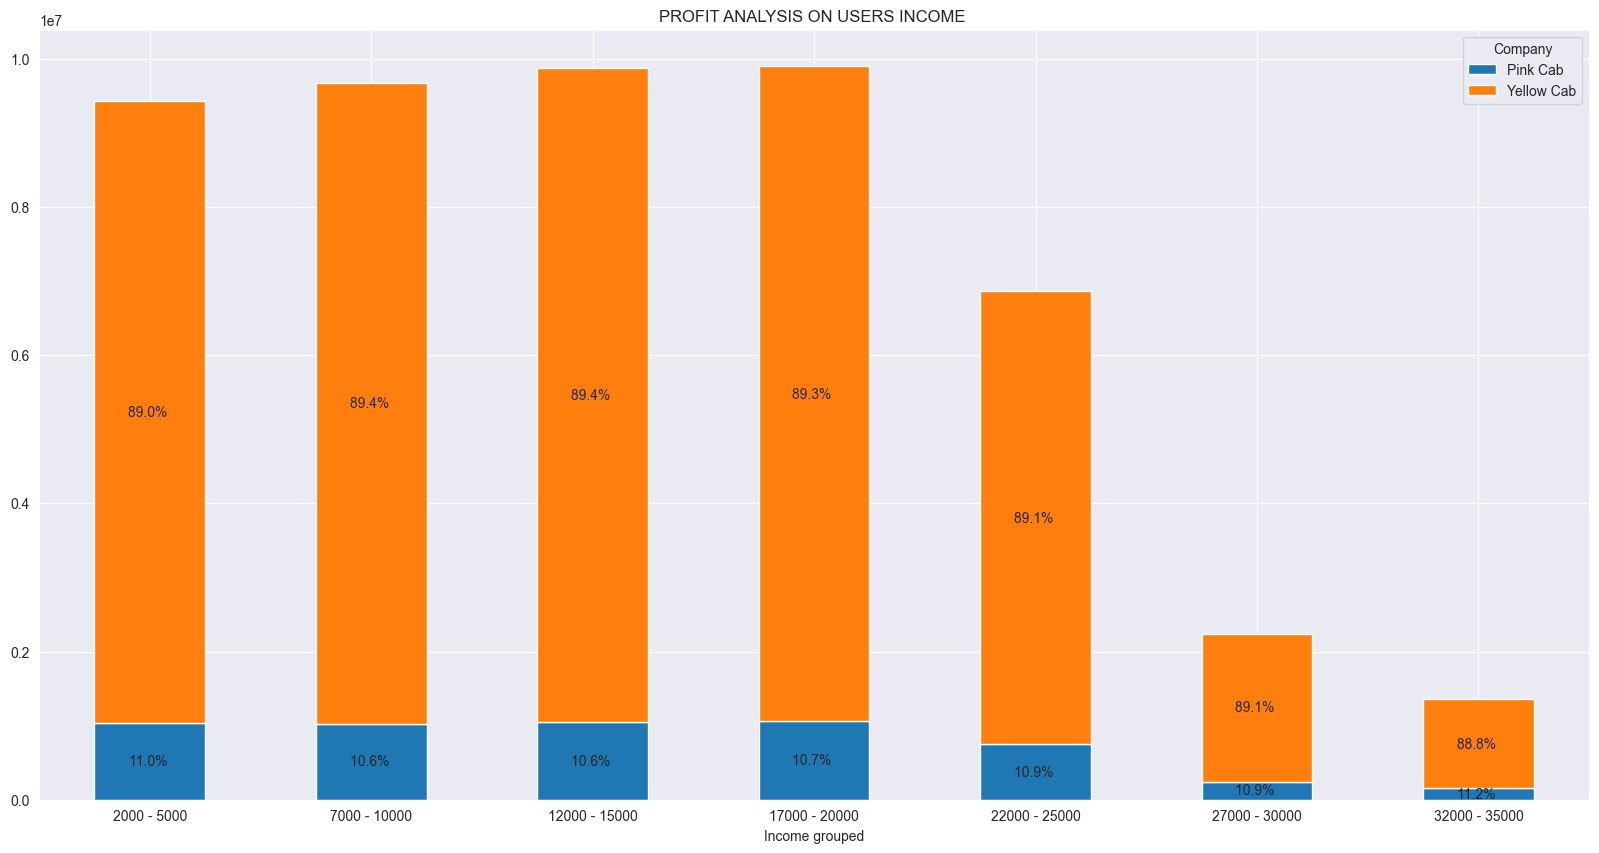

In [306]:
pivot_income_profit = Global_cab_data.pivot_table(index = ["Income grouped"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_income_profit, "PROFIT ANALYSIS ON USERS INCOME ",0.45,20,10)

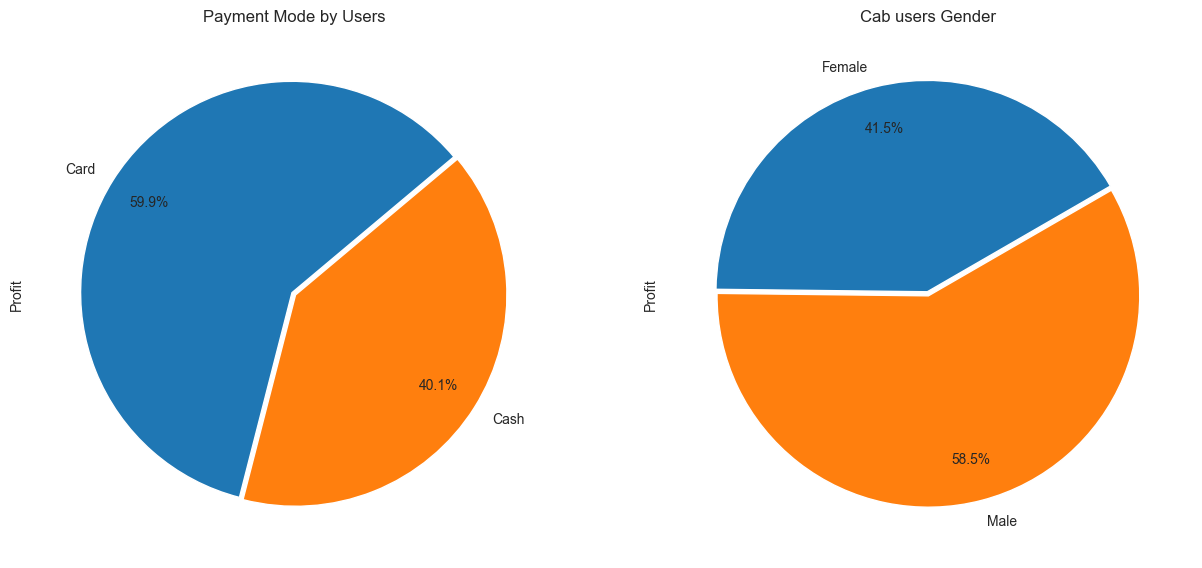

In [307]:
# customer payment mode and gender visualization
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Payment Mode by Users')
Global_cab_data.groupby('Payment_Mode')['Profit'].sum().plot(kind='pie',y='Payment_Mode',startangle=40,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)

plt.subplot(1,2,2)
plt.title('Cab users Gender')
Global_cab_data.groupby('Gender')['Profit'].sum().plot(kind='pie',y='GENDER',startangle=30,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)
plt.show()

Most cab users are male, they are 57.3% of the total user and prefer paying with Card which represent 60% .

<AxesSubplot: title={'center': ' PROFIT PER COMPANY '}, ylabel='Profit'>

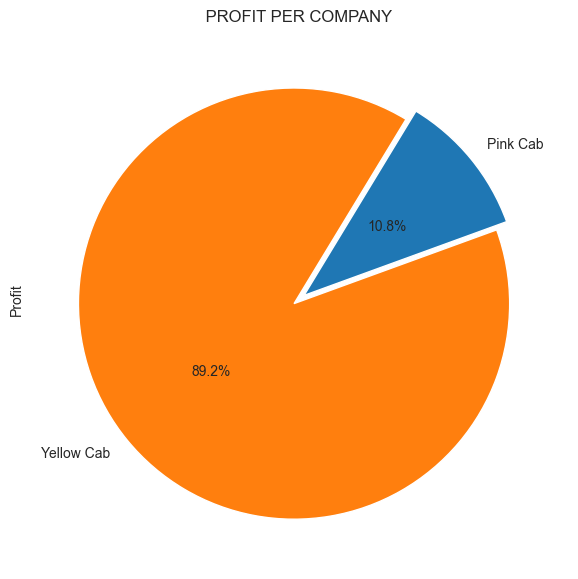

In [308]:
# Profit per company
plt.title(" PROFIT PER COMPANY ")
Global_cab_data.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)


Yellow cab Company made 89.2% of the total profit

In [312]:
# Extracting the month and year from the travel date column and year column

Global_cab_data['Travel_year_Month'] = pd.to_datetime(Global_cab_data['Date of Travel']).dt.to_period('M')
Global_cab_data['Travel_year']=pd.DatetimeIndex(Global_cab_data['Date of Travel']).year
Global_cab_data['Travel_month']=pd.DatetimeIndex(Global_cab_data['Date of Travel']).month
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01,2016,1
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01,2016,1
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1


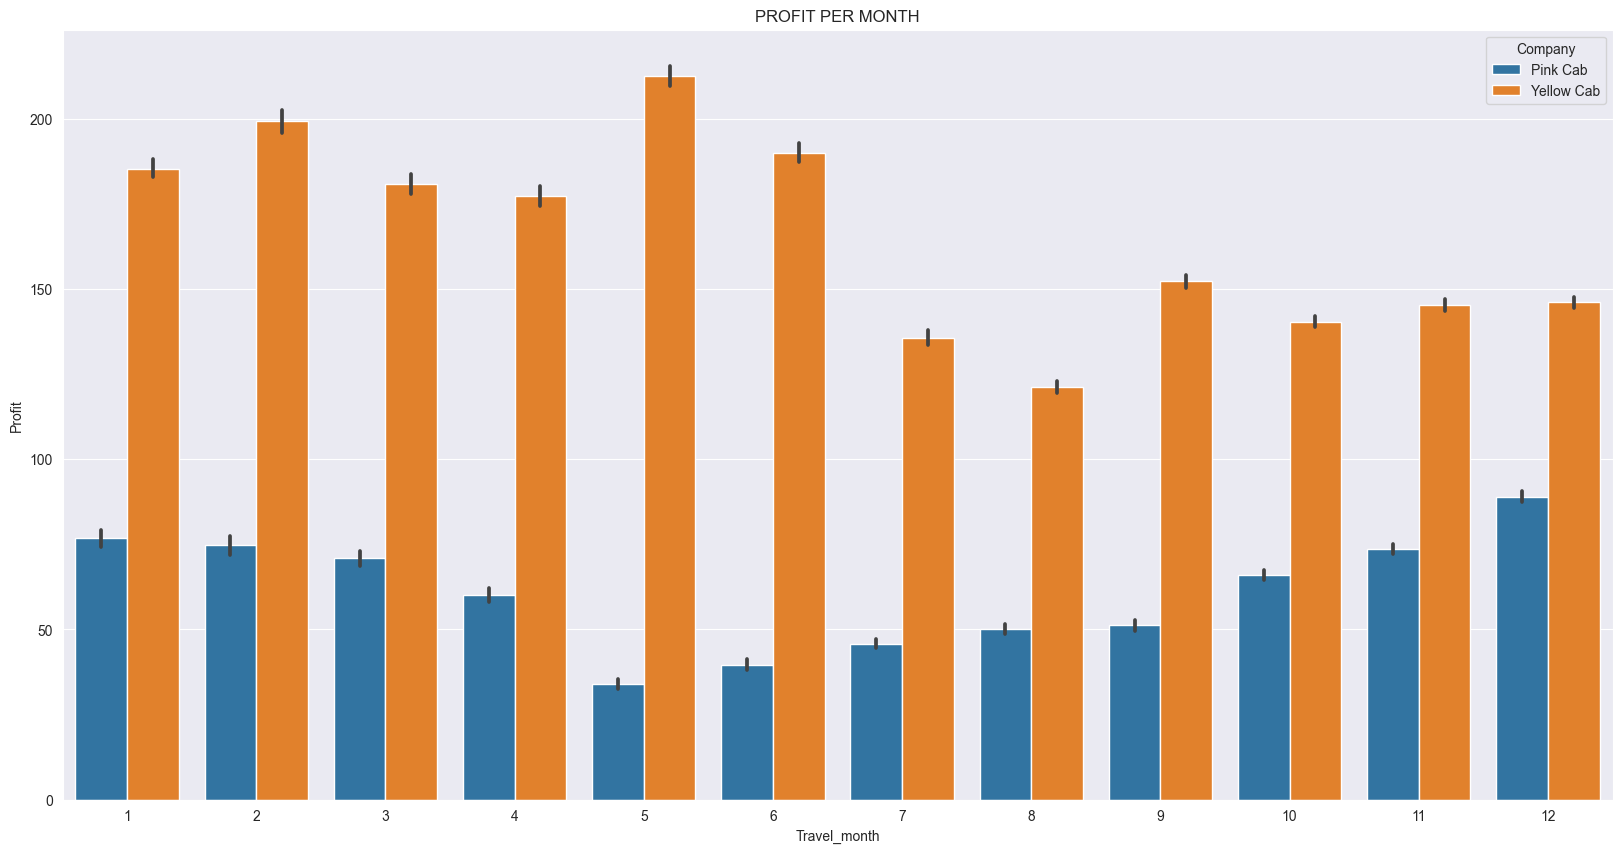

In [313]:
# Visualizing the profit by year and month

plt.figure(figsize=(20,10))
ax=sb.barplot(Global_cab_data['Travel_month'],Global_cab_data['Profit'],hue="Company",data=Global_cab_data)
# xt = plt.xticks(rotation=70)
plt.title("PROFIT PER MONTH")
plt.show()

<Figure size 2000x1000 with 0 Axes>

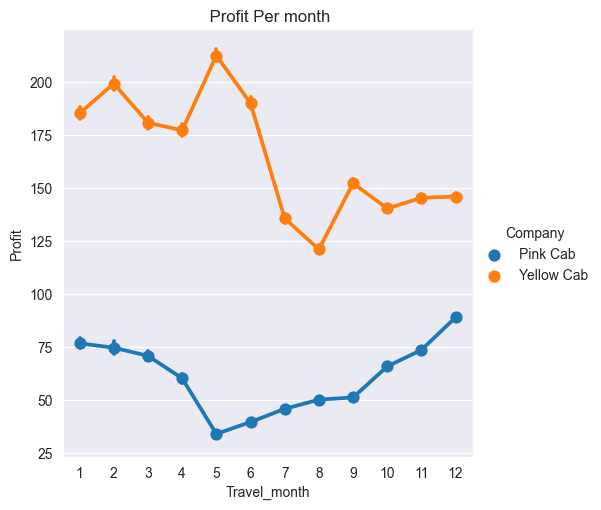

In [314]:
plt.figure(figsize=(20,10))
sb.catplot(x="Travel_month",
            y="Profit",
            hue="Company",
            kind="point", 
            data=Global_cab_data)
plt.title(" Profit Per month")

plt.show()

Text(0.5, 1.0, 'RIDES PER MONTH')

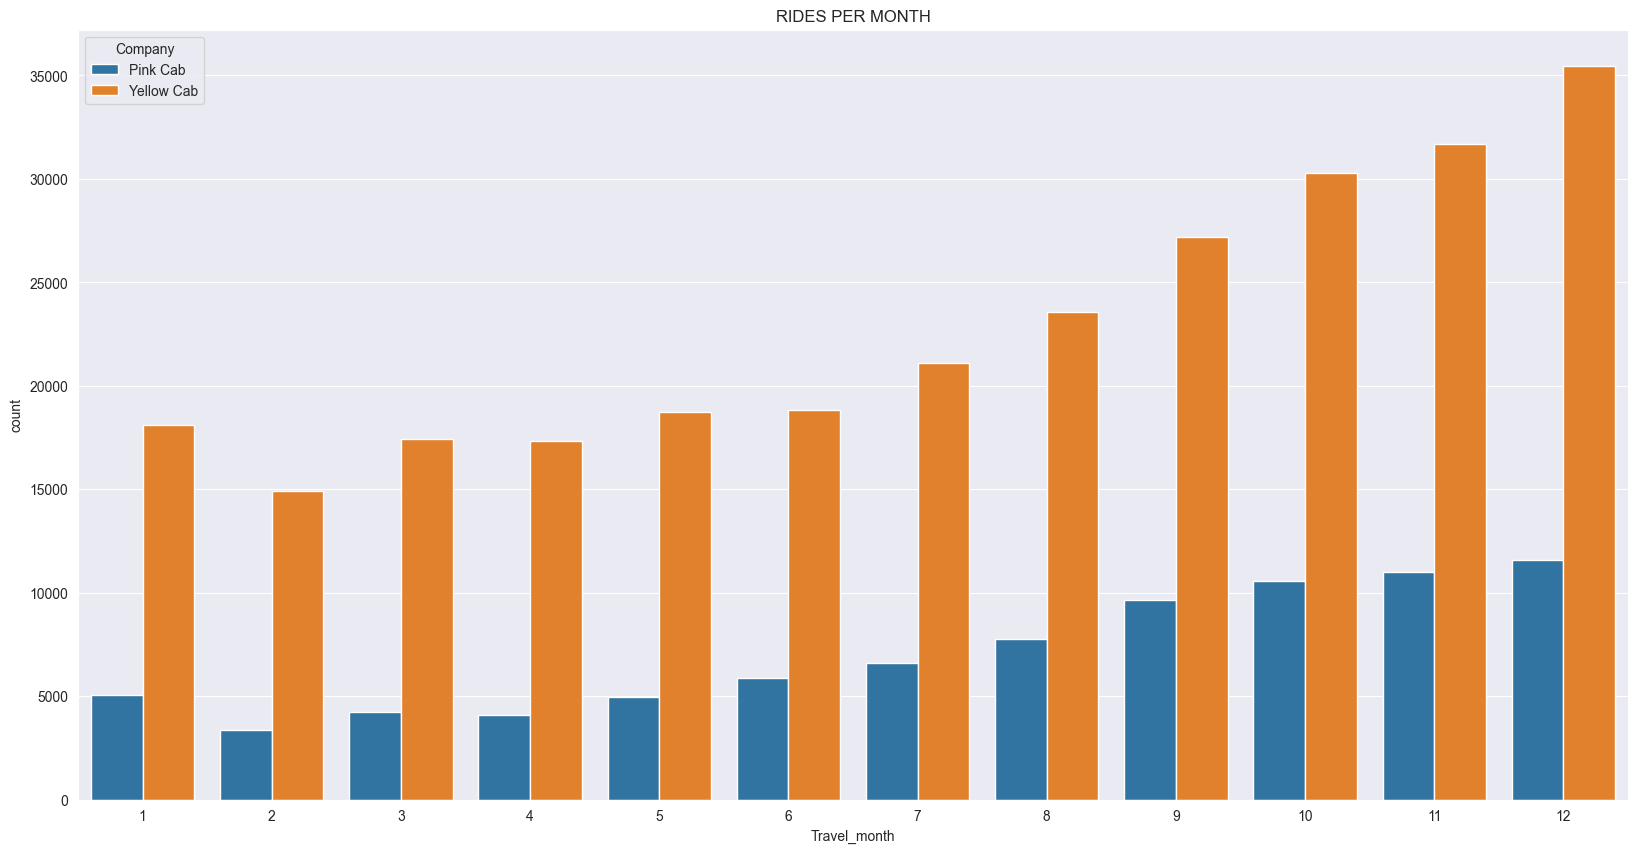

In [315]:
plt.figure(figsize=(20,10))
sb.countplot(Global_cab_data['Travel_month'],hue="Company",data=Global_cab_data)
plt.title("RIDES PER MONTH")

In [316]:
def plot_figure3(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
#     ax.xticks(rotation=30)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label =  " " + str(pivot_table.loc[i][j].astype('int64')) + ""
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

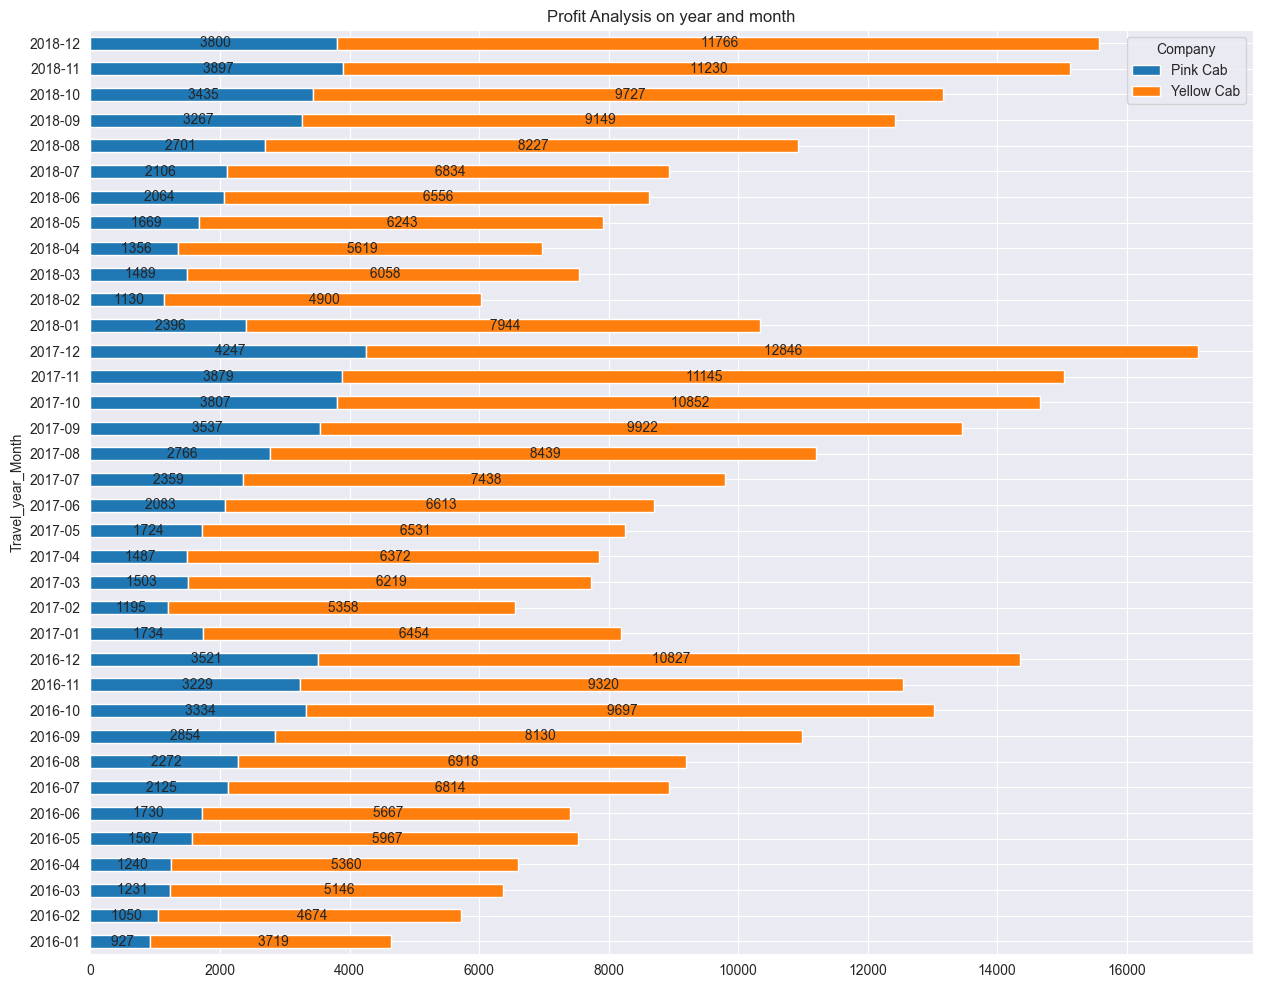

In [317]:
Travel_yearMonth_data = Global_cab_data.pivot_table(index = ['Travel_year_Month'], columns = 'Company', values = 'Profit', aggfunc = 'count')
plot_figure3(Travel_yearMonth_data, "Profit Analysis on year and month",15,15,12)

In [318]:
def plot_figure(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

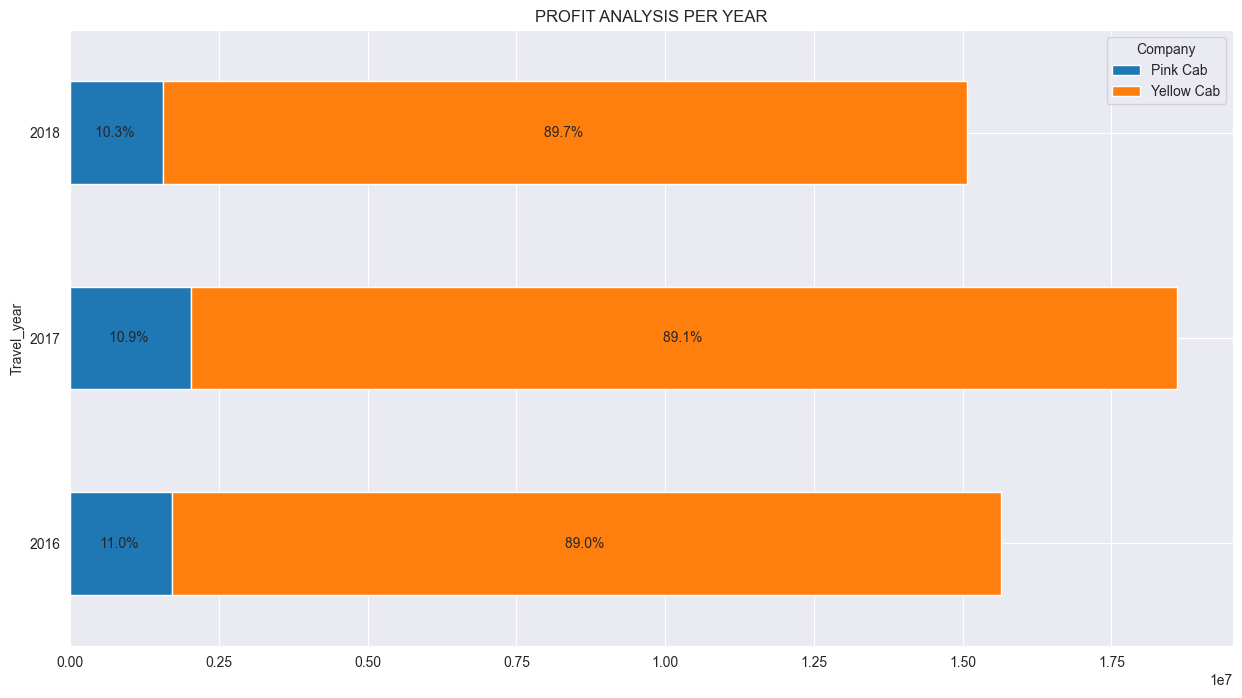

In [319]:
pivot_year_profit = Global_cab_data.pivot_table(index = ['Travel_year'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_year_profit, "PROFIT ANALYSIS PER YEAR",10,15,8)

This chart allow us to see that each year, Yellow cab comapny makes closely 90% of the total profit of both companies

Text(0.5, 1.0, 'PROFIT PER KM TRAVELLED')

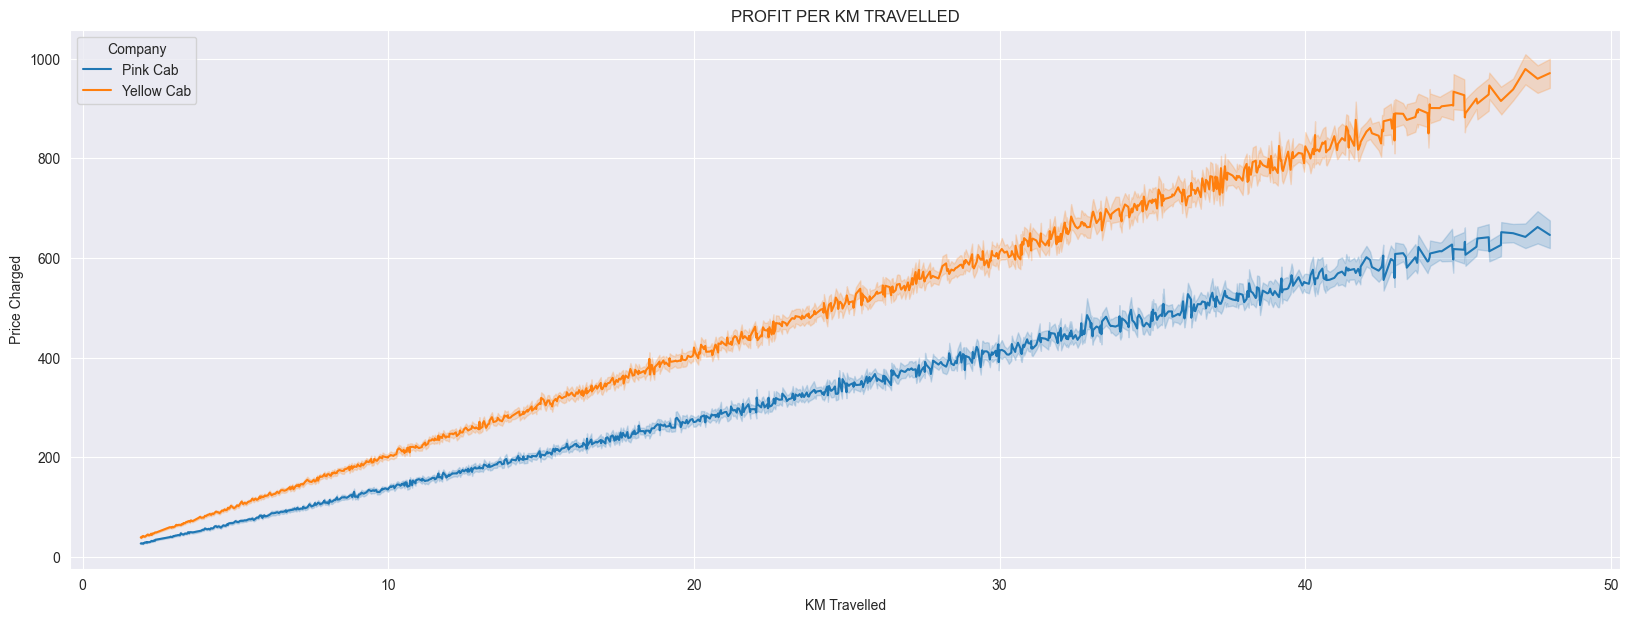

In [320]:
# KM TRAVELLED AND  and PRICE CHARGED

plt.figure(figsize=(20,7))
sb.lineplot(Global_cab_data['KM Travelled'],Global_cab_data['Price Charged'],hue="Company",data=Global_cab_data)
plt.title("PROFIT PER KM TRAVELLED")

The longer the KM travelled the higher the price charges from both company howerver the Yellow cab company charged higher than the Pink cab company

In [321]:
# lets group the KM traveled

label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

Global_cab_data["KM_grouped"] = pd.cut(Global_cab_data['KM Travelled'], range(0,55, 10), right=False, labels=label)
Global_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,Male,28,10813,57.3150,20 - 29,7000 - 10000,2016-01,2016,1,30 - 39
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11,40 - 49
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,Male,27,9237,23.6660,20 - 29,7000 - 10000,2016-01,2016,1,20 - 29
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1,0 - 9


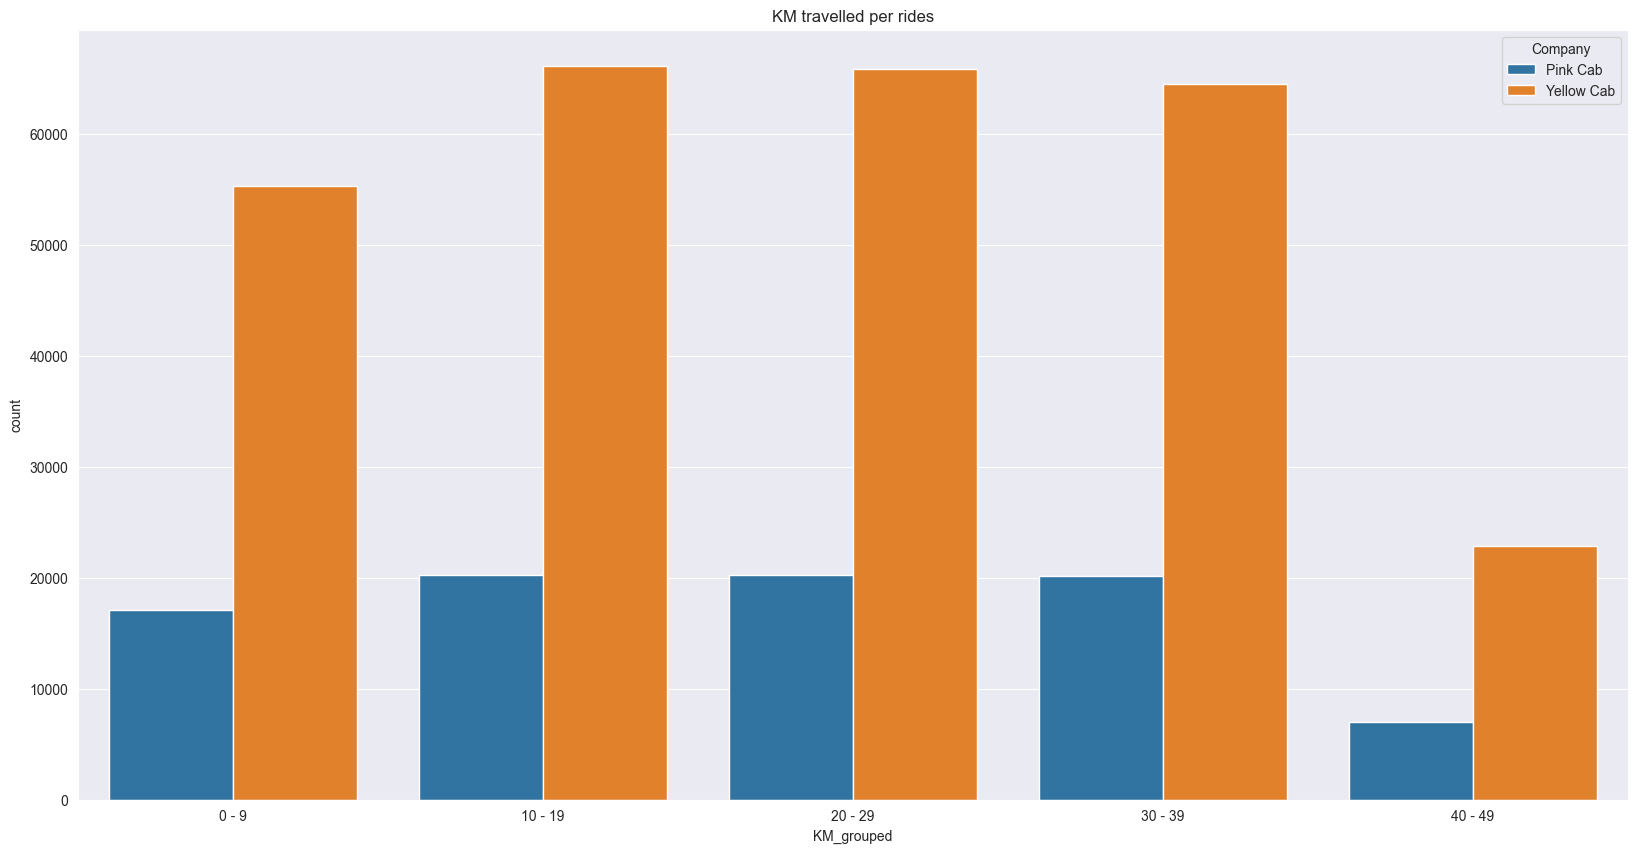

In [323]:
# visualizing the KM counts

plt.figure(figsize=(20,10))
sb.countplot(Global_cab_data['KM_grouped'], hue='Company',data=cab_data)
# xt = plt.xticks(rotation=70)
plt.title("KM travelled per rides")
plt.show()

Most users take a trip of 10 to 39 km

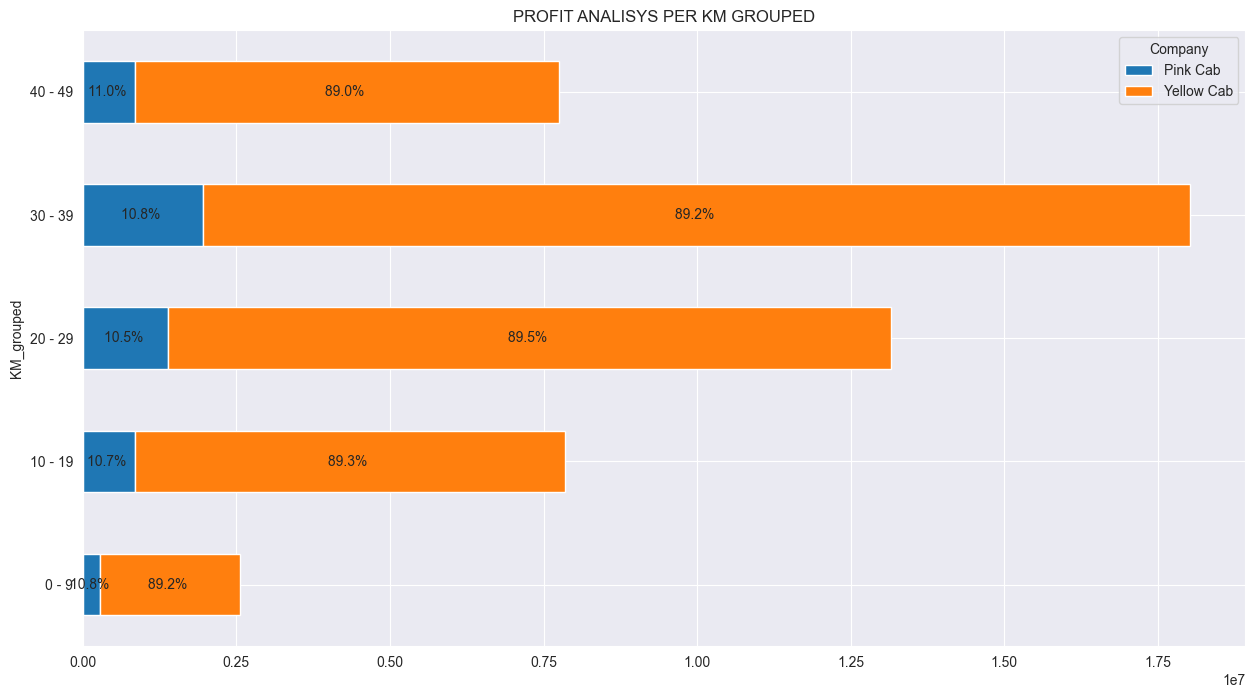

In [324]:
pivot_KM_profit = Global_cab_data.pivot_table(index = ['KM_grouped'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_KM_profit, "PROFIT ANALISYS PER KM GROUPED",10,15,8)

This chart represents the number of Km travelled registed from yellow cab and Pink cab company. Most users took a ride of 10 to 30 KM and 76% users choose Yellow cab and only 24% travelled with Pink cab company, from where the yellow cab made more profit compared to the other.

<AxesSubplot: ylabel='Profit'>

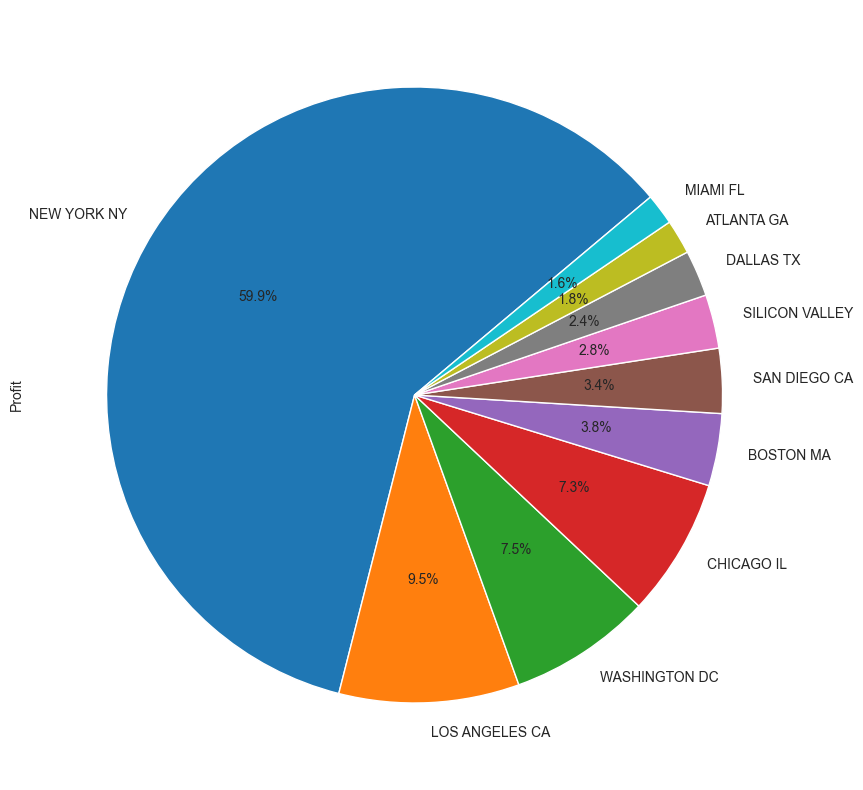

In [326]:
# TOP 10 CITIES WITH THE MOST PROFIT

Global_cab_data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

New York city has 60% of all the companies profit, it is the city with the highest number of users.

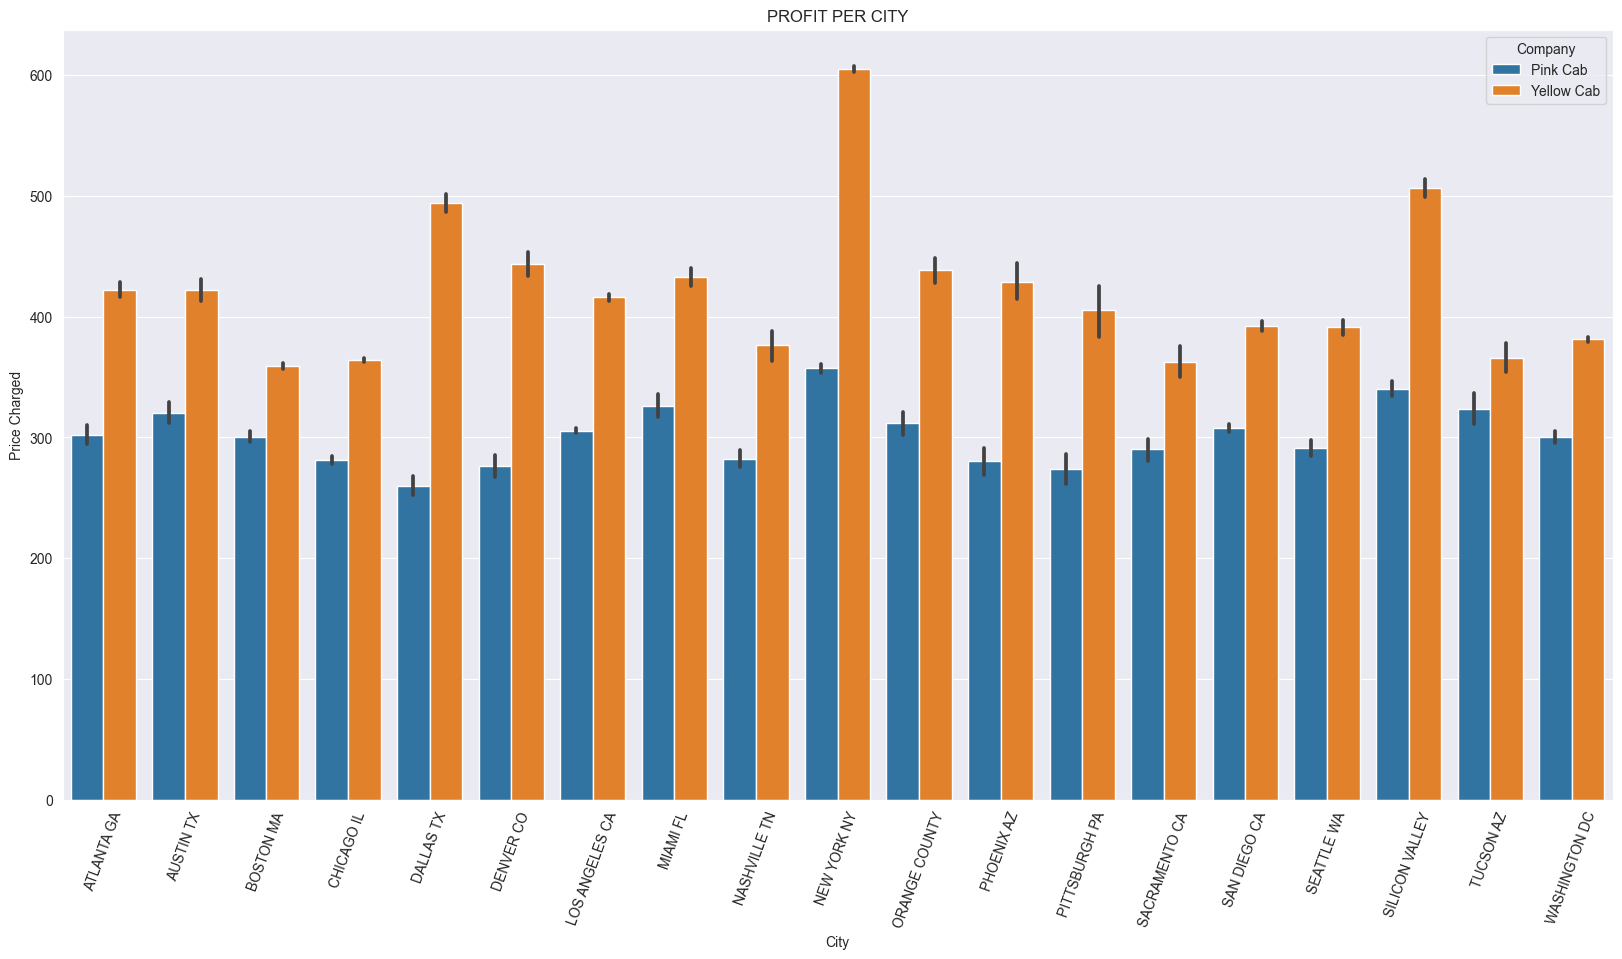

In [327]:
# visualizing the difference between the city and the price charged made by the companies


plt.figure(figsize=(20,10))
sb.barplot(Global_cab_data['City'],Global_cab_data['Price Charged'], hue='Company',data=Global_cab_data)
xt = plt.xticks(rotation=70)
plt.title("PROFIT PER CITY")
plt.show()

Yello Cab company charges higher than the Pink Cab company in all cities, pink Cab profit looks constant and ranges from 290 to 370 while The yellow cab charges higher in populated city in terms of users and has an insonstant profit that ranges wider.

['41.4% ', '14.0% ', '52.1% ', '16.5% ', '17.5% ', '44.6% ', '8.4% ', '34.2% ', '31.0% ', '38.2% ', '58.6% ', '86.0% ', '47.9% ', '83.5% ', '82.5% ', '55.4% ', '91.6% ', '65.8% ', '69.0% ', '61.8% ']


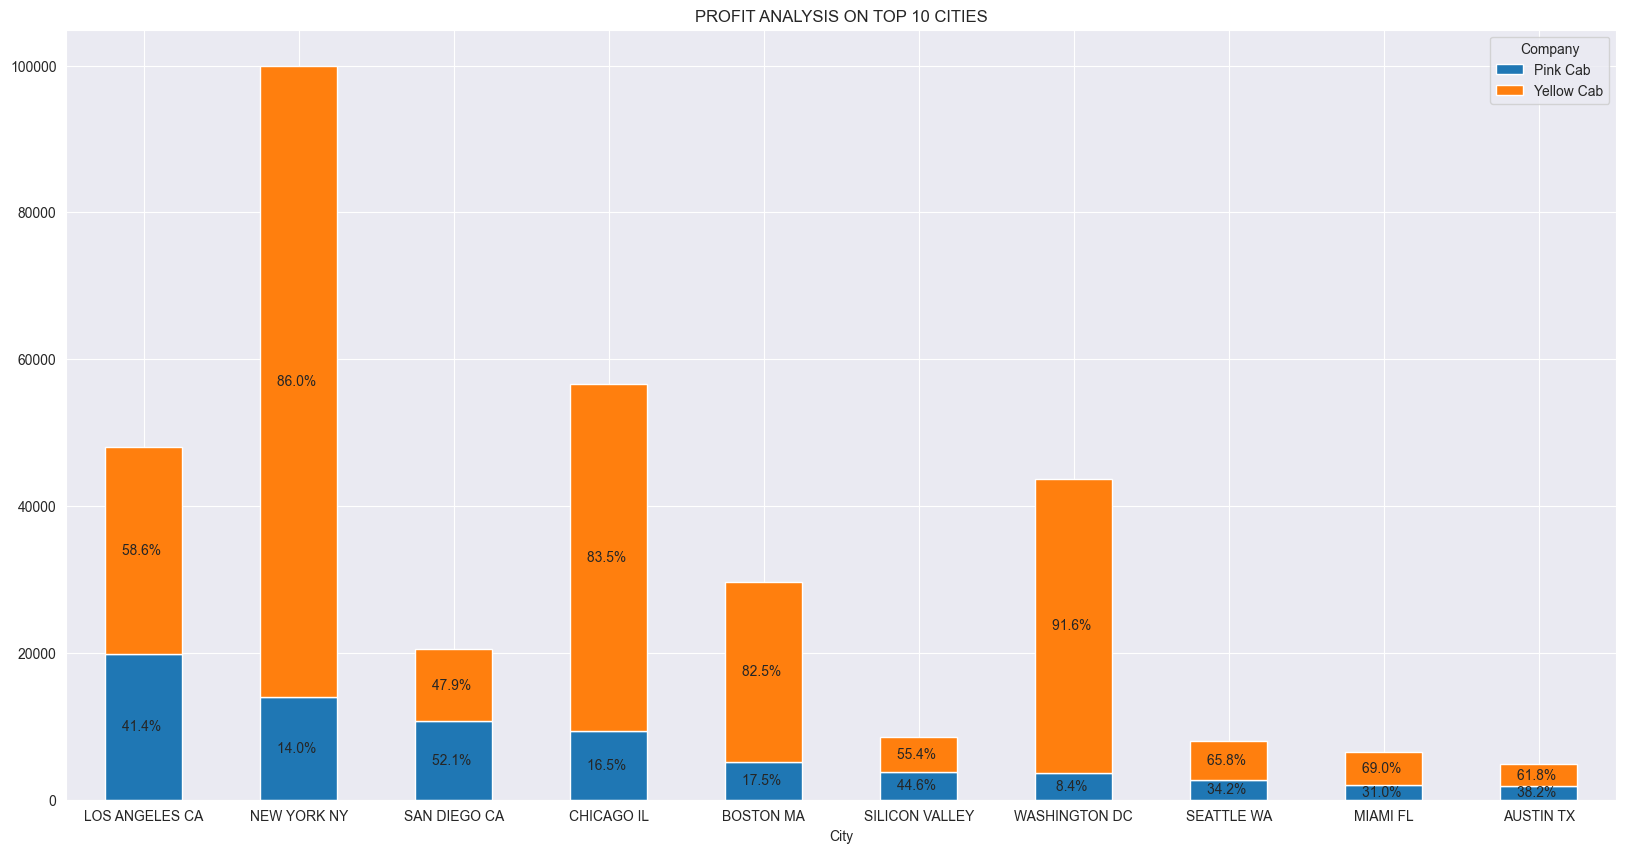

In [329]:
# TOP 10 CITIES IN TERMS OF PROFIT

pivot_city_profit = Global_cab_data.pivot_table(index = ['City'], columns = 'Company', values = 'Profit', aggfunc = 'count')
pivot_city_profit=pivot_city_profit.sort_values("Pink Cab",ascending=False).head(10)
plot_figure2(pivot_city_profit, "PROFIT ANALYSIS ON TOP 10 CITIES",0.45,20,10)

The comapanies made profit from the most populated city in terms of cab users but Yellow cab company made more profit in the top 10 cities with the most users.

In [330]:
# let's take a look at the users

Global_cab_data['Customer ID'].value_counts().head(5)

494     54
2939    53
2766    51
1070    51
858     50
Name: Customer ID, dtype: int64

## THE PINK CAB COMPANY DATA

In [331]:
# Pink Cab Profit Margin
Pink_cab_data=Global_cab_data[Global_cab_data['Company']=="Pink Cab"]
Pink_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
0,10000011,29290,Card,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,20 - 29,7000 - 10000,2016-01,2016,1,30 - 39
3,10000012,27703,Card,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,20 - 29,7000 - 10000,2016-01,2016,1,20 - 29
6,10395626,27703,Card,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,Male,27,9237,25.096,20 - 29,7000 - 10000,2018-10,2018,10,10 - 19
7,10000013,28712,Cash,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,50 - 59,7000 - 10000,2016-01,2016,1,0 - 9
11,10000014,28020,Cash,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,20 - 29,22000 - 25000,2016-01,2016,1,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359331,10437193,47760,Card,2018-01-05,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,Male,47,8823,91.627,40 - 49,7000 - 10000,2018-01,2018,1,30 - 39
359332,10437278,18620,Card,2018-01-02,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,Male,27,2876,39.108,20 - 29,2000 - 5000,2018-01,2018,1,20 - 29
359333,10437570,14974,Cash,2018-01-05,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,Male,51,8020,121.593,50 - 59,7000 - 10000,2018-01,2018,1,20 - 29
359334,10437576,41135,Card,2018-01-05,Pink Cab,TUCSON AZ,35.96,461.77,381.176,Female,24,14269,80.594,20 - 29,12000 - 15000,2018-01,2018,1,30 - 39


In [332]:
# Yellow Cab Revenue

PC_income=Pink_cab_data['Profit'].sum()
print("The Income of the Pink cab comapny is : ",round(PC_income,2))

The Income of the Pink cab comapny is :  5307328.32


In [333]:
PC_Gross_margin=(Pink_cab_data['Price Charged'].sum()-Pink_cab_data['Cost of Trip'].sum())/Pink_cab_data['Price Charged'].sum()*100
print("The margin of the Pink cab campany is : ",round(PC_Gross_margin,2))

The margin of the Pink cab campany is :  20.16


In [334]:
# profit per ride
PC_profit_per_ride=Pink_cab_data['Profit'].sum()/len(Pink_cab_data['KM Travelled'])
print(" Pink cab campany Profit per ride is : ",round(PC_profit_per_ride,2))

 Pink cab campany Profit per ride is :  62.65


## THE YELLOW CAB DATA

In [335]:
# Yellow Cab Profit Margin

Yellow_cab_data=Global_cab_data[Global_cab_data['Company']=="Yellow Cab"]
Yellow_cab_data

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,Age group,Income grouped,Travel_year_Month,Travel_year,Travel_month,KM_grouped
1,10351127,29290,Cash,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,Male,28,10813,281.2772,20 - 29,7000 - 10000,2018-07,2018,7,20 - 29
2,10412921,29290,Card,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,Male,28,10813,194.6480,20 - 29,7000 - 10000,2018-11,2018,11,40 - 49
4,10320494,27703,Card,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,Male,27,9237,253.9808,20 - 29,7000 - 10000,2018-04,2018,4,30 - 39
5,10324737,27703,Cash,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,Male,27,9237,50.8912,20 - 29,7000 - 10000,2018-05,2018,5,0 - 9
8,10079404,28712,Card,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,Male,53,11242,210.0920,50 - 59,7000 - 10000,2016-09,2016,9,30 - 39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,Female,42,19417,47.2656,40 - 49,17000 - 20000,2018-01,2018,1,10 - 19
359388,10439799,12490,Cash,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,Male,33,18713,105.0980,30 - 39,17000 - 20000,2018-01,2018,1,10 - 19
359389,10439838,41414,Card,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,Male,38,3960,71.2100,30 - 39,2000 - 5000,2018-01,2018,1,10 - 19
359390,10439840,41677,Cash,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,Male,23,19454,21.8600,20 - 29,17000 - 20000,2018-01,2018,1,0 - 9


In [336]:
# Yellow Cab Revenue

YC_income=Yellow_cab_data['Profit'].sum()
print("The Income of the Yellow cab comapny is : ",round(YC_income,2))

The Income of the Yellow cab comapny is :  44020373.17


In [337]:
YC_Gross_margin=(Yellow_cab_data['Price Charged'].sum()-Yellow_cab_data['Cost of Trip'].sum())/Yellow_cab_data['Price Charged'].sum()*100
print("The margin of the Yellow cab campany is : ",round(YC_Gross_margin,2))

The margin of the Yellow cab campany is :  34.98


In [338]:
# profit per ride
YC_profit_per_ride=Yellow_cab_data['Profit'].sum()/len(Yellow_cab_data['KM Travelled'])
print(" Yellow cab campany Profit per ride is : ",round(YC_profit_per_ride,2))

 Yellow cab campany Profit per ride is :  160.26


In [339]:
# comparative table

table = [['Company','margin', 'Profit', 'Rides', 'Profit Per Rides'],
        ['Yellow Cab',round(YC_Gross_margin,2),round(YC_income,2),274681, round(YC_profit_per_ride,2)],
        ['Pink cab',round(PC_Gross_margin,2), round(PC_income,2),84711,  round(PC_profit_per_ride,2) ]]


display(HTML(tabulate(table, tablefmt = 'html')))

Company,margin,Profit,Rides,Profit Per Rides
Yellow Cab,34.98,44020373.17,274681,160.26
Pink cab,20.16,5307328.32,84711,62.65


## CONCLUSION

We have evaluated both cab companies on the following points and found Yellow cab better than Pink cab:

- Most Users prefer travelling with Yellow cab than Pink cab
- Users tarvelled mostly with Yellow cab on short and long distance trip
- Yellow cab company charged more in populated City which is a good strategy and increase its profit
- Yellow cab owns 89% of the total profit made by both companies
- Yellow cab has 90% of total profit each year
- Yellow cab charged higher than Pink cab

We will advise the XYZ company to invest in Yellow Cab company for its glorious benefit.